# Compressão de Imagens

## O Formato JPEG

## A Transformada do Cosseno Discreta de Fourier (DCT)

## Usando DCT na Compressão de Imagens JPEG em Grayscale

# Setup Inicial

## Bibliotecas Usadas no Projeto

In [45]:
import numpy as np
import matplotlib.pyplot as plt
#Funções que implementam a transformada discreta do cosseno de fourier
from scipy.fftpack import dct, idct
import cv2 # Biblioteca usada para importar imagens
from math import floor


## Funções Auxiliares

O módulo scipy.fftpack fornece funções apenas para transformadas de uma dimensão, a função abaixo converte uma função de transformada discreta de fourier unidimensional para bidimensional.

In [46]:
def transform2D(img,function):
    return np.transpose(function(np.transpose(function(img,norm = "ortho")),norm = "ortho"))

Função responsável por segmentar uma imagem e aplicar uma função sobre os segmentos de tamanho **size X size** da imagem.

In [47]:
def segmentation(img,size,function=transform2D,function2 =dct):
    copy = np.zeros(img.shape)
 
    for i in range(copy.shape[0]//size):
        for j in range(copy.shape[1]//size):
            copy[i*size:(i+1)*size,j*size:(j+1)*size] = function(img[i*size:(i+1)*size,j*size:(j+1)*size],function2)
        
    return copy

A função abaixo é uma função auxiliar que é utilizada para o melhor entendimento da função **thresholdingPC**. Ela retorna o index que representa **n%** da matriz que representa a imagem quando esta é convertida para um array unidimensional.

In [48]:
def percent(img,n):
    return floor((img.shape[0]*img.shape[1])*(n/100))

Função responsável por filtrar através do método thresholding de segmentação, a imagem no domínio da frequência. Esta função iguala a zero os valores de frequência que estão abaixo de um certo limiar, que é cálculado através do enésimo valor de maior magnitude da matriz que representa a imagem.

In [49]:
def thresholdingPC(img,pc):
    imgCopy = img.copy()
    sortedCts = np.sort(abs(imgCopy.ravel()))
    threshold = sortedCts[-percent(imgCopy,pc)]
    imgCopy[abs(imgCopy) < threshold] = 0;
    return imgCopy

Função auxiliar para a função **thresholdingMean**. Ela recebe um segmento de uma imagem  **img** que já passou pela tranformada de fourier, e baseado no critério dado pela função **function** calcula o limiar (threshold) para filtrar os coeficientes redundantes e igualá-los a zero.

In [50]:
def filterImg(img,function):
    imgCopy = img.copy();
    threshold = function(np.abs(imgCopy))
    #print(threshold)
    imgCopy[abs(imgCopy) < threshold ] = 0
    return imgCopy

Função que filtra os segmentos da imagem, aplicando a média dos valores da matriz  de tamanho  **size X size**  como método estatistico para cálcular o limiar (threshold)

In [51]:
def thresholdingMean(img,size):
    imgCopy = img.copy()
    imgCopy = segmentation(imgCopy,size,filterImg,np.mean)
    return imgCopy;
    

Função que é um compilado das funções acima. Ela basicamente recebe uma imagem JPEG e algumas informações adicionais e executa a compressão desta. O passo a passo de como ela funciona será explicado com mais detalhes futuramente.

In [66]:
def compress(img, thresholding = thresholdingMean,argThres = 8, seg = 8, save = False, path = "imgCMP.jpg"):
    compImg = img.copy()
    compImg = segmentation(compImg,seg)
    compImg = thresholding(compImg,argThres)
    compImg = segmentation(compImg,seg,function2 = idct)
    if(save):
        cv2.imwrite(path,compImg)
    return compImg

# Compressão de Imagens Na Prática

In [67]:
path = "../BANCO-DE-IMAGENS/img6.jpg"
imgBGR = cv2.imread(path)
imgRGB = cv2.cvtColor(imgBGR,cv2.COLOR_BGR2RGB)
imgGRAY = cv2.cvtColor(imgBGR,cv2.COLOR_BGR2GRAY)
#img = np.mean(img,-1)
#img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)# Converte a imagem para grayscale (Preto e branco)

True

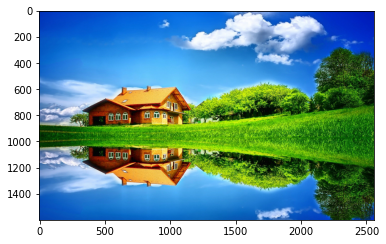

In [68]:
plt.imshow(imgRGB)
cv2.imwrite("generated-files/imgBGR.jpg",imgBGR)

True

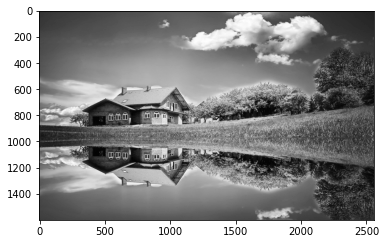

In [69]:
plt.imshow(imgGRAY,cmap = "gray")
cv2.imwrite("generated-files/imgGRAY.jpg",imgGRAY)

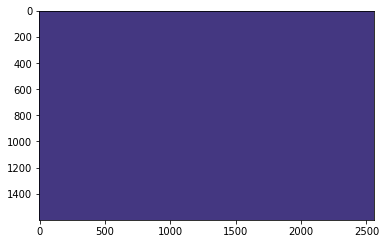

In [70]:
img_dct = transform2D(imgGRAY,dct)
plt.imshow(img_dct)

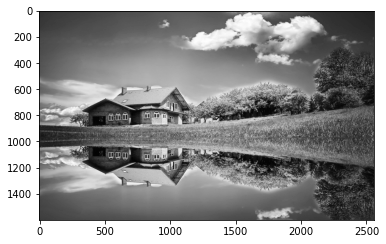

In [71]:
img_idct = transform2D(img_dct,idct)
plt.imshow(img_idct,cmap = "gray")

In [58]:
imgCMP = segmentation(imgGRAY,8)
imgCMP = thresholdingMean(imgCMP,8)
#np.savetxt('img2.out', img2)
imgCMP = segmentation(imgCMP,8,function2 = idct)
#np.savetxt('img3.out', img3)

True

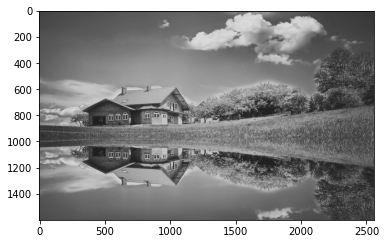

In [59]:
plt.imshow(imgCMP, cmap = "gray")
cv2.imwrite('generated-files/imgCMP.jpg',imgCMP)

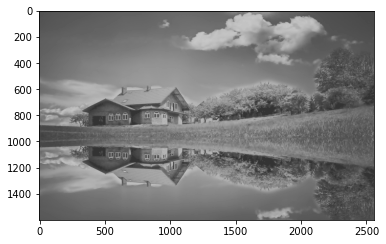

In [65]:
test = compress(imgGRAY,thresholding = thresholdingPC, argThres = 2,save = True)
plt.imshow(test, cmap = "gray")